$$ \textbf{Задание 3} $$
$$ \textbf{Богданов Александр} $$

In [6]:
import numpy as np
from tqdm import tqdm, trange
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpmath import mpf
import warnings
warnings.filterwarnings("ignore")

$\textbf{Задача 1 (15 баллов).}$ Пусть имеется обучающая и тестовая выборки $\left( \mathbf{X}_{\text{train}}, \mathbf{y}_{\text{train}} \right), \mathbf{X}_{\text{train}} \in \mathbb{R}^{m_1 \times n}, \mathbf{y}_{\text{train}} \in [-1, 1]^{m_1}$; $\left( \mathbf{X}_{\text{test}}, \mathbf{y}_{\text{test}} \right), \mathbf{X}_{\text{test}} \in \mathbb{R}^{m_2 \times n}, \mathbf{y}_{\text{test}} \in [-1, 1]^{m_2}$, полученные из общей модели генерации данных с совместным правдоподобием

$$p\left( \mathbf{y}, \mathbf{w}, \mathbf{X} | \mathbf{A} \right) = \prod_{i} N \left( \mathbf{x}_i | \mathbf{0}, \sigma^2 \mathbf{I}_n \right) N \left( \mathbf{w} | \mathbf{0}, \mathbf{A}^{-1} \right) \prod_{j} p \left( y_j | \mathbf{x}_j, \mathbf{w} \right),$$

где $p\left( y_j | \mathbf{x}_j, \mathbf{w} \right)$ дается моделью логистической регрессии, то есть

$$\mathbb{P} \left( y_j = 1 \right) = \frac{1}{1 + \exp \left( - \mathbf{w}^T \mathbf{x}_j \right)}.$$

1. Выписать формулу для апостериорного распределения $p\left( \mathbf{w} | \mathbf{X}_{\text{train}}, \mathbf{y}_{\text{train}}, \mathbf{A} \right)$ и получить его нормальную аппроксимацию $p\left( \mathbf{w} | \mathbf{X}_{\text{train}}, \mathbf{y}_{\text{train}}, \mathbf{A} \right) \approx N \left( \mathbf{w}_0, \mathbf{H}_0^{-1} \right)$ (4 балла);

2. Пусть $\hat{\mathbf{p}}$ - вектор оценок вероятностей принадлежности к классу 1 для некоторого классификатора на тестовой выборке. Введем уверенность $C\left( \mathbf{X}_{\text{test}}, \mathbf{y}_{\text{test}} \right)$ классификатора на тестовой выборке как

    $$C \left( \hat{\mathbf{p}} \right) = \sum\limits_{i = 1}^{m_2} | \hat{p}_i - 0.5 |.$$

    Рассмотрим также правдоподобие тестовой выборки относительно вектора $\hat{\mathbf{p}}$ как

    $$l \left( \mathbf{y}_{\text{test}}, \hat{\mathbf{p}} \right) = \prod_{i = 1}^{m_2} \hat{p}_i^{y_{\text{test}}^i} \left( 1 - \hat{p}_i \right)^{1 - y_{\text{test}}^i}.$$

    Считая $m_2 = 1000$, а $\sigma^2 = 1$, $\mathbf{A} = \mathbf{I}_n$ известными и фиксированными, для разных размеров обучающей выборки $m_1$ сравнить с помощью сэмплирования уверенность классификатора на тестовой выборке и правдоподобие на ней для точечного MAP-классификатора вида

    $$ \hat{\mathbf{p}}_{\text{test}} = \frac{1}{1 + \exp \left( - \mathbf{X}_{\text{test}} \mathbf{w}_{\text{MAP}} \right)}.$$

    и для полного байесовского классификатора, учитывающего неопределенность в $\mathbf{w}$, вида

    $$ \hat{\mathbf{p}}_{\text{test}} = \int \frac{1}{1 + \exp\left( - \mathbf{X}_{\text{test}} \mathbf{w} \right)} p\left( \mathbf{w} | \mathbf{X}_{\text{train}}, \mathbf{y}_{\text{train}} \right) d\mathbf{w}. $$

    Какой практический вывод можно сделать из полученных результатов? (11 баллов)

$\textbf{Решение:}$

1. Найдем формулу для апостериорного распределения $p\left( \mathbf{w} | \mathbf{X}_{\text{train}}, \mathbf{y}_{\text{train}}, \mathbf{A} \right)$.

$$p \left( \mathbf{w} | \mathbf{X}_{\text{train}}, \mathbf{y}_{\text{train}}, \mathbf{A} \right) = \frac{p \left( \mathbf{y}_{\text{train}}, \mathbf{w} | \mathbf{X}_{\text{train}}, \mathbf{A} \right)}{p \left( \mathbf{y}_{\text{train}} | \mathbf{X}_{\text{train}}, \mathbf{A} \right)} \propto p \left( \mathbf{y}_{\text{train}} | \mathbf{X}_{\text{train}}, \mathbf{w} \right) p \left( \mathbf{w} | \mathbf{A} \right) = Q(\mathbf{w})$$

Тогда:

$$\mathbf{w}_{\text{MAP}} = \arg \max_{\mathbf{w}}Q(\mathbf{w}) = \arg \min_{\mathbf{w}}(-\log Q(\mathbf{w}))$$

Или:

$$\mathbf{w}_{\text{MAP}} = \arg \min_{\mathbf{w}} \left( - \sum\limits_{i = 1}^{m_1} \log \sigma(y_i \mathbf{w}^T \mathbf{x}_{\text{train}}^i) + \frac{1}{2}\mathbf{w}^T A \mathbf{w} \right)$$

Так как функция под $\arg \min$ является сильно выпуклой, то решение единственно и его можно найти численным методом. 

Воспользуемся аппроксимацией Лапласа:

$$\log Q(\mathbf{w}) \approx \log Q(\mathbf{w}_{\text{MAP}}) + \frac{1}{2} (\mathbf{w} - \mathbf{w}_{\text{MAP}})^T \nabla \nabla \log Q(\mathbf{w}_{\text{MAP}})(\mathbf{w} - \mathbf{w}_{\text{MAP}})$$

Обозначим $\mathbf{H}_0 = -\nabla \nabla \log Q(\mathbf{w}_{\text{MAP}})$. 

Получим:

$$Q(\mathbf{w}) \approx Q(\mathbf{w}_{\text{MAP}}) \exp \left( - \frac{1}{2} (\mathbf{w} - \mathbf{w}_{\text{MAP}})^T \mathbf{H}_0 (\mathbf{w} - \mathbf{w}_{\text{MAP}}) \right)$$

Тогда $p\left( \mathbf{w} | \mathbf{X}_{\text{train}}, \mathbf{y}_{\text{train}}, \mathbf{A} \right) \approx N(\mathbf{w}_{\text{MAP}}, \mathbf{H}_0^{-1})$

Посчитаем $\mathbf{H}_0$:

$$\mathbf{H}_0 = - \nabla \left( \sum\limits_{i = 1}^{m_1} \sigma(-y_{\text{train}}^i \mathbf{w}^T \mathbf{x}_{\text{train}}^i) y_{\text{train}}^i \mathbf{x}_{\text{train}}^i \right) + \mathbf{A} = \sum\limits_{i = 1}^{m_1} \sigma(y_{\text{train}}^i \mathbf{w}^T \mathbf{x}_{\text{train}}^i) \sigma(-y_{\text{train}}^i \mathbf{w}^T \mathbf{x}_{\text{train}}^i) \mathbf{x}_{\text{train}}^i \mathbf{x}_{\text{train}}^{i\ T} + \mathbf{A} = \sum\limits_{i = 1}^{m_1} \sigma(\mathbf{w}^T \mathbf{x}_{\text{train}}^i) \sigma(- \mathbf{w}^T \mathbf{x}_{\text{train}}^i) \mathbf{x}_{\text{train}}^i \mathbf{x}_{\text{train}}^{i\ T} + A = \mathbf{X}_{\text{train}}^T \mathbf{R} \mathbf{X}_{\text{train}} + \mathbf{A}$$

где $\mathbf{R} = diag(\sigma(\mathbf{w}^T \mathbf{x}_{\text{train}}^i) \sigma(- \mathbf{w}^T \mathbf{x}_{\text{train}}^i)$

То есть получили:

$$\mathbf{H}_0 = \mathbf{A} + \mathbf{X}_{\text{train}}^T \mathbf{R} \mathbf{X}_{\text{train}},\ \mathbf{R} = diag(\sigma(\mathbf{w}^T \mathbf{x}_{\text{train}}^i) \sigma(- \mathbf{w}^T \mathbf{x}_{\text{train}}^i))$$

2. С помощью сэмплирования проверим уверенность классификатора и правдоподобие на тестовой выборке.

In [66]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [67]:
def C(p):
    return sum(np.abs(p - 0.5))

In [68]:
def l(y, p):
    prod = 1
    for y_i, p_i in zip(y, p):
        prod *= (p_i**y_i) * (1 - p_i)**(1 - y_i)
    return prod

In [69]:
def w_MAP(X_train, y_train, A):
    def logQ(w):
        return -sum(np.log(sigmoid(y_train * (X_train @ w)))) + 1 / 2 * w.T @ A @ w
    return minimize(logQ, x0=np.zeros(X_train.shape[1]))['x']

In [70]:
def p_MAP(X_train, y_train, X_test, A):
    w_map = w_MAP(X_train, y_train, A)
    return sigmoid(X_test @ w_map)

Полный байессовский классификатор:

$$ \hat{\mathbf{p}}_{\text{test}} = \int \sigma \left( - \mathbf{X}_{\text{test}} \mathbf{w} \right) p\left( \mathbf{w} | \mathbf{X}_{\text{train}}, \mathbf{y}_{\text{train}} \right) d\mathbf{w} = \mathbb{E}[\sigma \left( - \mathbf{X}_{\text{test}} \mathbf{w} \right)]$$

Данный интеграл нет возможности посчитать, поэтому будем считать сэмплироанием с учетом $p\left( \mathbf{w} | \mathbf{X}_{\text{train}}, \mathbf{y}_{\text{train}}, \mathbf{A} \right) \approx N(\mathbf{w}_{\text{MAP}}, \mathbf{H}_0^{-1})$

In [71]:
def p_BAYES(X_train, y_train, X_test, A, number=20):
    w_map = w_MAP(X_train, y_train, A)
    H_0 = A + X_train.T @ np.diag(sigmoid(X_train @ w_map) * sigmoid(-X_train @ w_map)) @ X_train
    w_distribution = stats.multivariate_normal(w_map, np.linalg.inv(H_0))
    
    summa = 0
    for _ in range(number):
        summa += sigmoid(X_test @ w_distribution.rvs())

    return summa / number

In [75]:
m2 = 1000
n = 100
A = np.eye(n)
sigma = 1

w_distribution = stats.multivariate_normal(np.zeros(n), np.linalg.inv(A))
w = w_distribution.rvs()

X_test = stats.multivariate_normal(np.zeros(n), sigma**2 * np.identity(n)).rvs(size=m2)
y_test = stats.bernoulli(sigmoid(X_test @ w)).rvs(size=m2)

In [76]:
C_map_list = []
C_bayes_list = []

l_map_list = []
l_bayes_list = []

for m1 in trange(2, 5001, 500):
    X_train = stats.multivariate_normal(np.zeros(n), sigma**2 * np.identity(n)).rvs(size=m1)
    y_train = stats.bernoulli(sigmoid(X_train @ w)).rvs(size=m1)
    y_train[y_train == 0] = -1
    
    p_map = p_MAP(X_train, y_train, X_test, A)
    p_bayes = p_BAYES(X_train, y_train, X_test, A)
    
    C_map_list.append(C(p_map))
    C_bayes_list.append(C(p_bayes))
    
    l_map_list.append(l(y_test, p_map))
    l_bayes_list.append(l(y_test, p_bayes))

100%|███████████████████████████████████████████| 10/10 [02:10<00:00, 13.05s/it]


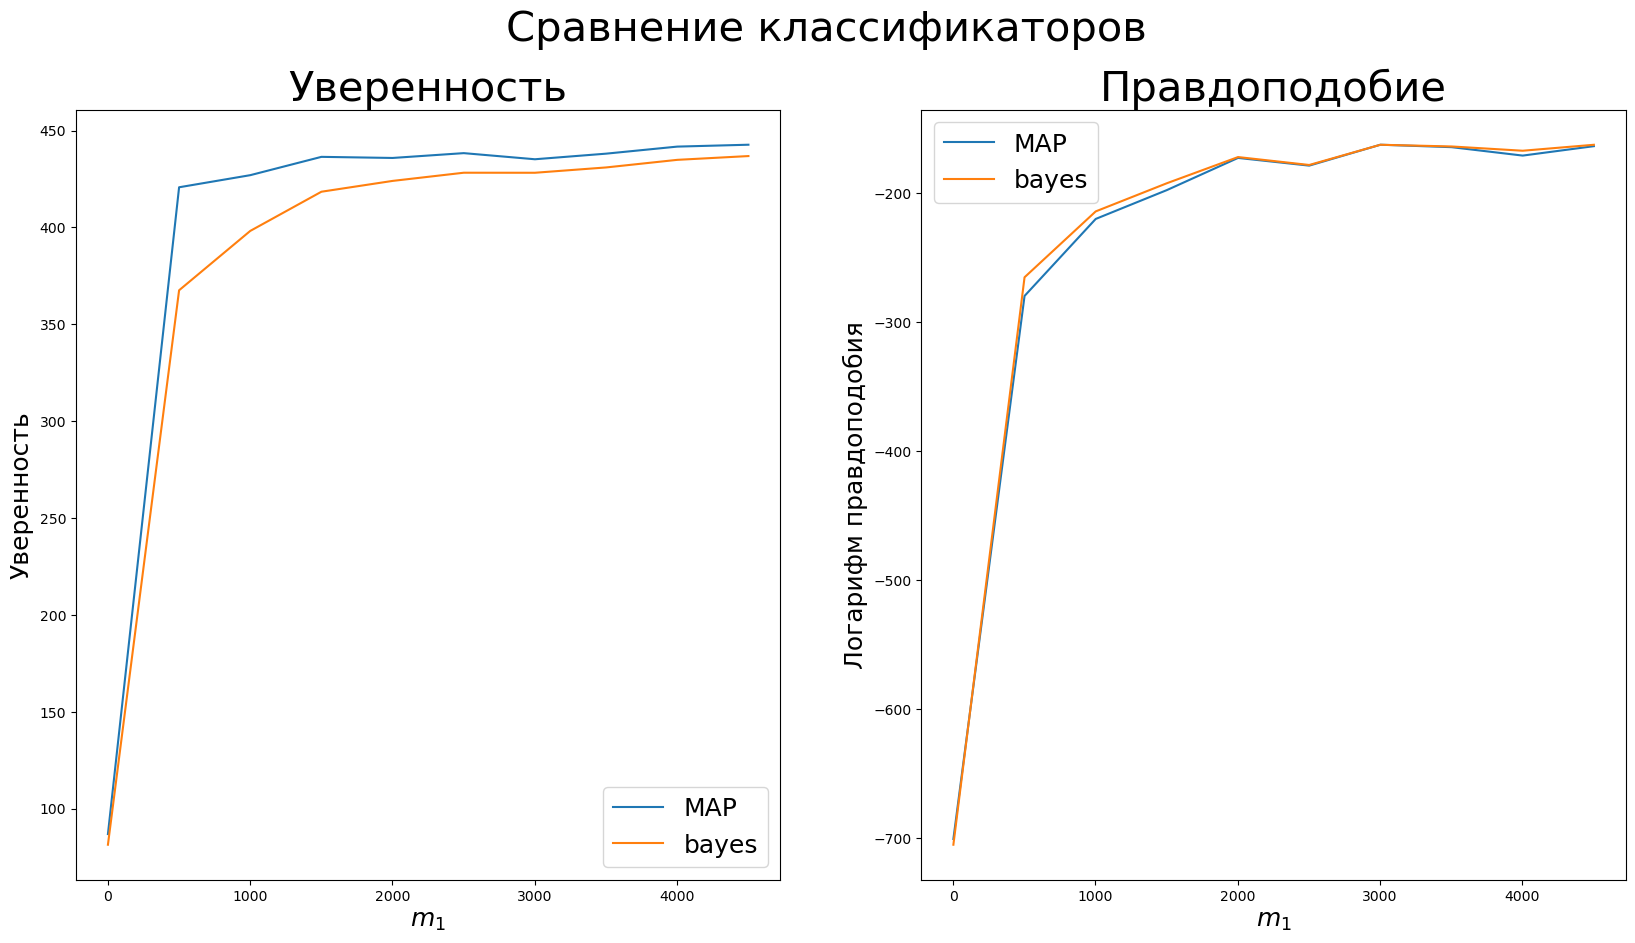

In [77]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(m1_list, C_map_list, label = "MAP")
plt.plot(m1_list, C_bayes_list, label = "bayes")
plt.title("Уверенность", fontsize=30)
plt.ylabel("Уверенность", fontsize = 18)
plt.xlabel("$m_1$", fontsize = 18)
plt.legend(fontsize = 18)

plt.subplot(1, 2, 2)
plt.plot(m1_list, np.log(l_map_list), label = "MAP")
plt.plot(m1_list, np.log(l_bayes_list), label = "bayes")
plt.title("Правдоподобие", fontsize=30)
plt.ylabel("Логарифм правдоподобия", fontsize = 18)
plt.xlabel("$m_1$", fontsize = 18)
plt.legend(fontsize = 18)

plt.suptitle("Сравнение классификаторов", fontsize=30)

plt.show()

Как мы видим уверенность для точечного MAP-классификатора при небольших значениях $m_1$ выше, чем у полного байесовского классификатора, но при больших значениях $m_1$ они примерно одинаковые. Правдоподобие у обоих классификаторов примерно одинаковое. То есть необязательно использовать полный байессовский классфикатор (итеграл долго считается) - вместо него можно использовать точечный MAP-классификатор, он быстрее считается, а результаты дает примерно такие же.

$\textbf{Задача 2 (20 баллов).}$ Пусть имеется модель линейной регрессии с нормальным шумом

$$ \mathbf{y} = \mathbf{X} \mathbf{w} + \varepsilon, \quad \varepsilon \sim N \left( 0, \sigma^2 \mathbf{I}_n \right), $$

где $\sigma^2$ - известно, и априорным распределением на $\mathbf{w}$ $p(\mathbf{w}) = N \left( \mathbf{w} | \mathbf{m}, \text{diag}(\mathbf{s}) \right)$, где $\mathbf{m}$ и $\text{diag}(\mathbf{s})$ - неизвестные гиперпараметры.

1. Выписать совместное правдоподобие $p\left( \mathbf{y}, \mathbf{w} | \mathbf{X}, \mathbf{m}, \mathbf{s} \right)$, задающее вероятностную модель. (2 балла)

2. Получить апостериорное распределение на вектор $\mathbf{w}$, предполагая $\mathbf{m}$ и $\mathbf{s}$ известными. Что происходит, если $s_i=0$? (4 балла)

3. Решить задачу максимизации обоснованности

    $$ p\left( \mathbf{y} | \mathbf{X}, \mathbf{m}, \mathbf{s} \right) = \int p \left( \mathbf{y} | \mathbf{X}, \mathbf{w} \right) p \left( \mathbf{w} | \mathbf{m}, \text{diag}(\mathbf{s}) \right) d \mathbf{w} $$
    
    по гиперпараметрам $\mathbf{m}$ и $\mathbf{s}$. Какой вывод можно сделать из полученного результата? (14 баллов)

$\textbf{Решение:}$

1. Совместное правдоподобие:
    
    $$p\left( \mathbf{y}, \mathbf{w} | \mathbf{X}, \mathbf{m}, \mathbf{s} \right) = p\left( \mathbf{y} | \mathbf{X}, \mathbf{w} \right) p\left(\mathbf{w} | \mathbf{m}, \mathbf{s} \right) = N(\mathbf{X} \mathbf{w}, \sigma^2 \mathbf{I}_n)N \left( \mathbf{w} | \mathbf{m}, \text{diag}(\mathbf{s}) \right)$$
    
2. Найдем формулу для апостериорного распределения $p\left( \mathbf{w} | \mathbf{X}, \mathbf{y}, \mathbf{m}, \mathbf{s} \right)$:

    $$ p\left( \mathbf{w} | \mathbf{X}, \mathbf{y}, \mathbf{m}, \mathbf{s} \right) = \dfrac{p\left( \mathbf{y}, \mathbf{w} | \mathbf{X}, \mathbf{m}, \mathbf{s} \right)}{p\left( \mathbf{y}| \mathbf{X}, \mathbf{m}, \mathbf{s} \right)} \propto p\left( \mathbf{y}| \mathbf{X}, \mathbf{w} \right) p\left( \mathbf{w} | \mathbf{m}, \mathbf{s} \right) = Q(\mathbf{w})$$
    
    Тогда:

    $$\mathbf{w}_{\text{MAP}} = \arg \max_{\mathbf{w}}Q(\mathbf{w}) = \arg \min_{\mathbf{w}}(-\log Q(\mathbf{w}))$$

    Или:

    $$\mathbf{w}_{\text{MAP}} = \arg \min_{\mathbf{w}} \left( \frac{1}{2 \sigma^2} \left( \mathbf{y} - \mathbf{X} \mathbf{w} \right)^T \left( \mathbf{y} - \mathbf{X} \mathbf{w} \right) + \frac{1}{2} \left( \mathbf{w} - \mathbf{m} \right)^T \left( \text{diag} \left( \mathbf{s} \right) \right)^{-1} \left( \mathbf{w} - \mathbf{m} \right) \right)$$

    Так как функция под $\arg \min$ является сильно выпуклой, то решение единственно. Его можно найти явно, так как задача квадратичная.

    Воспользуемся аппроксимацией Лапласа (в данном случае она точная, так как задача квадратичная):

    $$\log Q(\mathbf{w}) = \log Q(\mathbf{w}_{\text{MAP}}) + \frac{1}{2} (\mathbf{w} - \mathbf{w}_{\text{MAP}})^T \nabla \nabla \log Q(\mathbf{w}_{\text{MAP}})(\mathbf{w} - \mathbf{w}_{\text{MAP}})$$

    Обозначим $\mathbf{H}_0 = -\nabla \nabla \log Q(\mathbf{w}_{\text{MAP}})$. 

    Получим:

    $$Q(\mathbf{w}) = Q(\mathbf{w}_{\text{MAP}}) \exp \left( - \frac{1}{2} (\mathbf{w} - \mathbf{w}_{\text{MAP}})^T \mathbf{H}_0 (\mathbf{w} - \mathbf{w}_{\text{MAP}}) \right)$$

    Тогда $p\left( \mathbf{w} | \mathbf{X}, \mathbf{y}, \mathbf{m}, \mathbf{s} \right) = N(\mathbf{w}_{\text{MAP}}, \mathbf{H}_0^{-1})$

    Посчитаем $\mathbf{w}_{\text{MAP}}$:
    
    $$\nabla \log Q(\mathbf{w}_{\text{MAP}}) = \frac{1}{\sigma^2}\mathbf{X}^T \left( \mathbf{y} - \mathbf{X} \mathbf{w} \right) - \left( \text{diag} \left( \mathbf{s} \right) \right)^{-1} \left( \mathbf{w} - \mathbf{m} \right) = 0 \Rightarrow \mathbf{w}_{\text{MAP}} = \left( \frac{1}{\sigma^2} \mathbf{X}^T \mathbf{X} + \left( \text{diag} \left( \mathbf{s} \right) \right)^{-1} \right)^{-1} \left( \frac{1}{\sigma^2} \mathbf{X}^T \mathbf{y} + \left( \text{diag} \left( \mathbf{s} \right) \right)^{-1} \mathbf{m} \right)$$

    Посчитаем $\mathbf{H}_0$:

    $$\mathbf{H}_0 = \frac{1}{\sigma^2} \mathbf{X}^T \mathbf{X} + \left( \text{diag} \left( \mathbf{s} \right) \right)^{-1}$$
    
    Если $s_i = 0$, тогда априорное распределение соответствующей компоненты $w_i$ вырождается в константное - $m_i$.
    
3. Воспользуемся EM-алгоритмом:

    $$ F(q, \mathbf{m}, \mathbf{s}) = - \int q(\mathbf{w}) \log q(\mathbf{w}) d \mathbf{w} + \int q(\mathbf{w}) \log p \left( \mathbf{y}, \mathbf{w} | \mathbf{X}, \mathbf{m}, \mathbf{s} \right) d \mathbf{w}  = \log p \left( \mathbf{y} | \mathbf{X}, \mathbf{m}, \mathbf{s} \right) - D_{\text{KL}} \left( q(\mathbf{w}) \| p \left(\mathbf{w} | \mathbf{X}, \mathbf{y}, \mathbf{m}, \mathbf{s} \right) \right) \rightarrow \max_{q, \mathbf{m}, \mathbf{s}}$$
    
    - E-шаг: $F(q, \mathbf{m}, \mathbf{s}) \rightarrow \max\limits_q$

        $$ q(\mathbf{w}) = p \left( \mathbf{w} | \mathbf{X}, \mathbf{y}, \mathbf{m}, \mathbf{s} \right) = N(\mathbf{w}_{\text{MAP}}, \mathbf{H}_0^{-1})$$
        
    - M-шаг: $$ \mathbb{E}_{q(\mathbf{w})} \log p \left( \mathbf{y}, \mathbf{w} | \mathbf{X}, \mathbf{m}, \mathbf{s} \right) = \int q(\mathbf{w}) \log p\left( \mathbf{y}, \mathbf{w} | \mathbf{X}, \mathbf{m}, \mathbf{s} \right) d \mathbf{w} \rightarrow \max_{\mathbf{m}, \mathbf{s}}$$
    
    $$ \tilde{F} \left( \mathbf{m}, \mathbf{s} \right) = \mathbb{E}_{q(\mathbf{w})} \log p \left( \mathbf{y}, \mathbf{w} | \mathbf{X}, \mathbf{m}, \mathbf{s} \right) \propto \mathbb{E}_{q(\mathbf{w})} \log p \left( \mathbf{w} | \mathbf{m}, \mathbf{s} \right) \propto - \frac{1}{2} \sum\limits_{i = 1}^{n} \log{s_i} - \frac{1}{2} \mathbb{E}_{q(\mathbf{w})} \left[ \left( \mathbf{w} - \mathbf{m} \right)^T \left( \text{diag} \left( \mathbf{s} \right) \right)^{-1} \left( \mathbf{w} - \mathbf{m} \right) \right] = - \sum\limits_{i = 1}^{n} \log{s_i} -\sum\limits_{i = 1}^{n} \frac{\mathbb{E}_{q(\mathbf{w})} \left( w_i - m_i \right)^2}{s_i} \rightarrow \max_{\mathbf{m}, \mathbf{s}}$$
    
    $$\frac{\partial \tilde{F}}{\partial m_i} = 0 \Leftrightarrow \mathbb{E}_{q(\mathbf{w})} \left( w_i - m_i \right) = 0 \Rightarrow m_i^{t + 1} = \mathbb{E}_{q(\mathbf{w})} w_i = w_{\text{MAP}\ i}^t$$
    
   $$\frac{\partial \tilde{F}}{\partial s_i} = 0 \Leftrightarrow s_i^{t + 1} = \mathbb{E}_{q(\mathbf{w})} \left( w_i - m_i \right)^2 = H_{0\ ii}^{-1\ t}$$
   
   То есть:
   
   $$\mathbf{m}^* = \left( \frac{1}{\sigma^2} \mathbf{X}^T \mathbf{X} + \left( \text{diag} \left( \mathbf{s} \right) \right)^{-1} \right)^{-1} \left( \frac{1}{\sigma^2} \mathbf{X}^T \mathbf{y} + \left( \text{diag} \left( \mathbf{s} \right) \right)^{-1} \mathbf{m}^* \right) \Rightarrow \mathbf{m}^* = \left( \mathbf{X}^T \mathbf{X} \right)^{-1} \mathbf{X}^T \mathbf{y} - \text{решение}\ \min\limits_\mathbf{m} \|\mathbf{y} - \mathbf{X}\mathbf{m}\|_2$$
   
   $$\text{diag} \left( \mathbf{s}^* \right) = \text{diag} \left( \frac{1}{\sigma^2} \mathbf{X}^T \mathbf{X} + \left( \text{diag} \left( \mathbf{s}^* \right) \right)^{-1} \right)^{-1}$$

$\textbf{Задача 3 (20 баллов).}$ Пусть имеется две двусторонние монеты, случайно и независимо выбранные из всех существующих монет достоинством в 2 рубля. Пусть было произведено $n_1 = 10$ бросаний первой монеты и $n_2 = 10000$ бросаний второй. Среди $n_1 = 10$ результатов бросания первой монеты было $k_1 = 3$ орла, а среди $n_2 = 10000$ бросаний второй - $k_2 = 5100$ орлов.

1. Построить вероятностную модель эксперимента, записав правдоподобие и введя априорные распределения на вероятности $p_1$ и $p_2$ выпадания орлов для первой и второй монеты соответственно. Опишите, как и из каких соображений Вы выбрали априорные распределения $q(p_1)$ и $q(p_2)$. (4 балла)

2. Получить апостериорные распределения $q(p_1 | k_1, n_1)$ и $q(p_2 | k_2, n_2)$. (4 балла)

3. Пусть теперь рассматривается две вероятностные модели: $M_1$ с $p_1 = p_2 = p$ и априорным распределением, которое было ранее выбрано Вами для $p_1$ и полная модель $M_2$ из пункта 1, где $p_1$ и $p_2$ априорно выбраны независимо из $q(p_1)$ и $q(p_2)$. Сосчитать апостериорную вероятность обеих моделей, считая их априори равновероятными ($q(M_1) = q(M_2) = 0.5$). Какой вывод можно сделать из результата? (12 баллов)

$\textbf{Решение:}$

1. Правдоподобие:
    
    $$q(k_1, k_2, p_1, p_2 | n_1, n_2) = q(k_1 | p_1, n_1) q(p_1) q(k_2 | p_2, n_2) q(p_2)$$
   
    Нет причин считать, что монеты делали не симметричными, поэтому не симметричной она может оказаться только случайно (брак на заводе, кто-то испортил, $\dots$). Поэтому в качестве априорного распределения стоит взять обрезанное на [0, 1] нормальное распределение с $\mu = 0.5$ и маленькой дисперсией.
   
    Но оценка выше - это взгляд на "видимые" монеты. Сейчас монеты особо не используются. Вполне возможно, что монет, которых мы "не видим", очень много. Например, которые лежат на дне фонтанов, водоемов, в земле, поломанные и тд.. В таком случае лучше использовать равномерное на отрезке [0, 1] распределение.
   
    Мне больше нравится первая версия, так как она кажется реальней. Но расчеты проведу для равномерного распределения, так как там все считается аналитически. (Для нормального распределения будет все аналогично, только интегралы не будут считаться аналитически)
   
    То есть $q(p_1) = I(p_1 \in [0, 1])$, $q(p_2) = I(p_2 \in [0, 1])$.
   
2. Найдем апостериорные вероятности:

    $$q(p | k, n) = \frac{q(k, p | n)}{q(k | n)} = \frac{q(k | p, n) q(p)}{q(k | n)}$$
   
    $$q(k | p, n) = C_n^k p^k (1 - p)^{n - k}$$
   
    $$q(k | n) = \int_0^1 q(k | p, n) q(p) dp = \int_0^1 C_n^k p^k (1 - p)^{n - k} dp = C_n^k B(k + 1, n - k + 1)$$
   
    Получаем:
   
    $$q(p | k, n) = Beta(k + 1, n - k + 1)$$
   
    То есть: 
   
    $$q(p_1 | k_1, n_1) = Beta(k_1 + 1, n_1 - k_1 + 1)$$
   
    $$q(p_2 | k_2, n_2) = Beta(k_2 + 1, n_2 - k_2 + 1)$$
   
3. Рассмотрим две модели $M_1$ и $M_2$:
    
    $$q_1(k_1, k_2, p_1, p_2 | n_1, n_2) = q(k_1 | n_1, p) q(k_2 | n_2, p) q(p)$$
    
    $$q_2(k_1, k_2, p_1, p_2 | n_1, n_2) = q(k_1 | n_1, p_1) q(k_2 | n_2, p_2) q(p_1) q(p_2)$$
    
    Апостериорные вероятности:
    
    $$p(M_i | k_1, k_2, n_1, n_2) = \frac{q(k_1, k_2, M_i | n_1, n_2)}{q(k_1, k_2 | n_1, n_2)} = \frac{q(M_i) q_i(k_1, k_2 | n_1, n_2)}{q(M_1) q_1(k_1, k_2 | n_1, n_2) + q(M_2) q_2(k_1, k_2 | n_1, n_2)} $$
    
    Так как $q(M_i) = \frac{1}{2}$, то:
    
    $$ p(M_i | k_1, k_2, n_1, n_2) = \frac{q_i(k_1, k_2 | n_1, n_2)}{q_1(k_1, k_2 | n_1, n_2) + q_2(k_1, k_2 | n_1, n_2)}$$
    
    Рассмотрим числитель:

    $$q_1(k_1, k_2 | n_1, n_2) = \int q_1(k_1, k_2 | n_1, n_2, p) q(p) dp = \int_0^1 C_{n_1}^{k_1} C_{n_2}^{k_2} p^{k_1 + k_2} (1 - p)^{n_1 + n_2 - k_1 - k_2} dp = C_{n_1}^{k_1} C_{n_2}^{k_2} B(k_1 + k_2 + 1, n_1 + n_2 - k_1 - k_2 + 1) $$
    
    $$q_2(k_1, k_2 | n_1, n_2) = \int \int q_2(k_1, k_2 | n_1, n_2, p_1, p_2) q(p_1) q(p_2) dp_1 dp_2 = \int_0^1 C_{n_1}^{k_1} p_1^{k_1} (1 - p_1)^{n_1 - k_1} dp_1 \int_0^1 C_{n_2}^{k_2} p_2^{k_2} (1 - p_2)^{n_2 - k_2} dp_2 = C_{n_1}^{k_1} C_{n_2}^{k_2} B(k_1 + 1, n_1 - k_1 + 1) B(k_2 + 1, n_2 - k_2 + 1) $$
    
    Получили:
    
    $$ p(M_1 | k_1, k_2, n_1, n_2) = \frac{B(k_1 + k_2 + 1, n_1 + n_2 - k_1 - k_2 + 1)}{B(k_1 + k_2 + 1, n_1 + n_2 - k_1 - k_2 + 1) + B(k_1 + 1, n_1 - k_1 + 1) B(k_2 + 1, n_2 - k_2 + 1)} =  \frac{B(5104, 4908)}{B(5104, 4908) + B(4, 8) B(5101, 4901)} \approx 0.54$$
    
    $$ p(M_2 | k_1, k_2, n_1, n_2) = \dfrac{B(k_1 + 1, n_1 - k_1 + 1) B(k_2 + 1, n_2 - k_2 + 1)}{B(k_1 + k_2 + 1, n_1 + n_2 - k_1 - k_2 + 1) + B(k_1 + 1, n_1 - k_1 + 1) B(k_2 + 1, n_2 - k_2 + 1)} = \frac{B(4, 8) B(5101, 4901)}{B(5104, 4908) + B(4, 8) B(5101, 4901)} \approx 0.46$$
    
    Апостериорная вероятность более простой модели больше.

P.S. Посчитаем для нормального распределения. Возьмем $\sigma^2 = 0.001$ и пренебрежем хвостами.

Получится:

$$q_1(k_1, k_2 | n_1, n_2) = \int q_1(k_1, k_2 | n_1, n_2, p) q(p) dp = C_{n_1}^{k_1} C_{n_2}^{k_2} \frac{1}{\sqrt{2 \pi \sigma^2}} \int_0^1 p^{k_1 + k_2} (1 - p)^{n_1 + n_2 - k_1 - k_2} \exp{\left( - \frac{(p - \mu)^2}{2\sigma^2} \right)} dp$$

$$q_2(k_1, k_2 | n_1, n_2) = \int \int q_2(k_1, k_2 | n_1, n_2, p_1, p_2) q(p_1) q(p_2) dp_1 dp_2 = C_{n_1}^{k_1} C_{n_2}^{k_2} \frac{1}{\sqrt{2 \pi \sigma^2}} \frac{1}{\sqrt{2 \pi \sigma^2}} \int_0^1  p_1^{k_1} (1 - p_1)^{n_1 - k_1} \exp{\left( - \frac{(p_1 - \mu)^2}{2\sigma^2} \right)} dp_1 \int_0^1 p_2^{k_2} (1 - p_2)^{n_2 - k_2} \exp{\left( - \frac{(p_2 - \mu)^2}{2\sigma^2} \right)} dp_2 $$

In [94]:
n1 = 10
n2 = 10000

k1 = 3
k2 = 5100

sigma = 0.001
mu = 0.5

def integral(p, n, k, sigma = sigma, mu = mu):
    return mpf(p)**k * mpf((1 - p))**(n - k) * np.exp(-(p - mu)**2 / (2 * sigma))

points = np.linspace(0,1,10000)
delta = points[1] - points[0]

int_1 = 0
int_2 = 0
int_3 = 0

for point in tqdm(points):
    int_1   += integral(point, n1, k1) * delta
    int_2   += integral(point, n2, k2) * delta
    int_3 += integral(point, n1 + n2, k1 + k2) * delta
    
integral_1 = int_3
integral_2 = 1 / np.sqrt(2 * np.pi * sigma) * int_1 * int_2

100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 9681.45it/s]


In [110]:
print(f"p(M_1 | k_1, k_2, n_1, n_2) = {round(integral_1 / (integral_1 + integral_2), 2)}")
print(f"p(M_2 | k_1, k_2, n_1, n_2) = {round(integral_2 / (integral_1 + integral_2), 2)}")

p(M_1 | k_1, k_2, n_1, n_2) = 0.48
p(M_2 | k_1, k_2, n_1, n_2) = 0.52


Как мы видим - результат получился примерно такой же.

$\textbf{Задача 4 (10 баллов).}$ 

1. Что такое дивергенция Кульбака-Лейблера (KL-divergence), что она показывает и когда определена? (2 балла)

2. Докажите, что значение дивергенции Кульбака-Лейблера неотрицательно. (3 балла)

3. Пусть у Вас есть две модели логистической регрессии с равномерным априорным псевдораспределением на параметр $\mathbf{w}$, оцененные на двух разных выборках $\left( \mathbf{X}_1, \mathbf{y}_1 \right)$ и $\left( \mathbf{X}_2, \mathbf{y}_2 \right)$ с одинаковым набором из двух признаков. Пусть апостериорные распределения для первой выборки 

    $$\mathbf{w} \sim N \left( \mathbf{w} \ | \ (1, 1)^T, \begin{pmatrix} 1 & 0 \\ 
                                                                          0 & 1 
                                                          \end{pmatrix} 
                        \right),$$ 

    а для второй выборки 

    $$\mathbf{w} \sim N \left( \mathbf{w} \ | \ (-8, -3)^T, \begin{pmatrix} 10000 & 0 \\
                                                                            0 & 2000 
                                                            \end{pmatrix}
                        \right).$$ 

    Считая, что выборки сгенерированы с помощью модели логистической регрессии, можно ли с уверенностью утверждать, что истинные векторы параметров этих моделей $\mathbf{w}_1$ и $\mathbf{w}_2$ разные? (5 баллов)

$\textbf{Решение:}$

1. Дивергенция Кульбака-Лейблера - неотрицательнозначный функционал, являющийся несимметричной мерой удалённости друг от друга двух вероятностных распределений, определённых на общем пространстве элементарных событий.

    $$D_{\text{KL}} \left( P || Q \right) = \int_X p \log{\frac{p}{q}} d \mu,\ \text{определена только если}\ q = 0 \Rightarrow p = 0$$
    
    Минимизация $D_{\text{KL}}$ используется для приближения сложного распределения $Q$ более простым $P$.
    
2. Воспользуемся интегральной формулировкой неравенства Йенсена. Пусть $\phi$ - выпуклая функция, тогда:

    $$ \int_X \alpha d \mu = 1,\ \alpha(x) \geq 0\ \text{п. в.} x \in X \Rightarrow \phi \left( \int_X \alpha f d \mu \right) \leq \int_X \alpha \phi(f) d \mu$$ 

    Тогда:

    $$D_{\text{KL}}\left( P \| Q \right) = \int_X p \log{\frac{p}{q}} d \mu = - \int_X p \log{\frac{q}{p}} d \mu \geq -\log \left( \int_X p \frac{q}{p} d \mu \right) = -\log \left( \int_X q d\mu \right) = 0$$
    
3. Известна формула для двух нормальных распределений ($N_0$ и $N_1$):

    $$D_{\text{KL}}\left( N_0 \| N_1 \right) = \frac{1}{2} \left( \text{tr} \left( \mathbf{\Sigma}_1^{-1} \mathbf{\Sigma}_0 \right) + \left( \mu_1 - \mu_0 \right)^T \mathbf{\Sigma}_1^{-1} \left( \mu_1 - \mu_0 \right) - d + \ln \left( \frac{\det \Sigma_1}{\det \Sigma_0} \right) \right)$$

In [111]:
def D_KL(m0, Sigma0, m1, Sigma1):
    return 1 / 2 * (np.trace(np.linalg.inv(Sigma1) @ Sigma0) + (m1 - m0).T @ np.linalg.inv(Sigma1) @ (m1 - m0) -
                    m1.size + np.log(np.linalg.det(Sigma1) / np.linalg.det(Sigma0)))

In [114]:
m0 = np.array([1, 1])
Sigma0 = np.array([[1, 0], [0, 1]])
m1 = np.array([-8, -3])
Sigma1 = np.array([[10000, 0], [0, 2000]])

In [116]:
print(f"D_KL(N_0||N_1) = {D_KL(m0, Sigma0, m1, Sigma1):.2f}")
print(f"D_KL(N_1||N_0) = {D_KL(m1, Sigma1, m0, Sigma0):.2f}")

D_KL(N_0||N_1) = 7.41
D_KL(N_1||N_0) = 6039.09


То есть можно сказать, что истинные векторы параметров этих моджелей разные. Но теорема Адуенко 2014 года говорит, что функция сходства, порожденная дивергенций Кульбака-Лейблера не является корректной. Другая теорема Адуенко 2014 года говорит, что функция сходства $s-score$ является корректной. А еще одна теорема Адуенко 2014 года говорит, что:

$$s(N_0, N_1) = \exp{ \left( -\frac{1}{2} \left( \mu_0 - \mu_1 \right)^T \left( \mathbf{\Sigma}_0 + \mathbf{\Sigma}_1 \right)^{-1} \left( \mu_0 - \mu_1 \right) \right)}$$

In [120]:
def s(m0, Sigma0, m1, Sigma1):
    return np.exp(-1 / 2 * (m0 - m1).T @ np.linalg.inv(Sigma0 + Sigma1) @ (m0 - m1))

In [121]:
print(f"s(N_0||N_1) = {s(m0, Sigma0, m1, Sigma1):.2f}")
print(f"s(N_1||N_0) = {s(m1, Sigma1, m0, Sigma0):.2f}")

s(N_0||N_1) = 0.99
s(N_1||N_0) = 0.99


Так как эта функция сходства корректна, то можно утвержать, что истинные векторы параметров этих моделей одинаковые.